In [1]:
! wget https://raw.githubusercontent.com/Mariogarber/PLN-Project/main/requirements.txt -O requirements.txt
! pip install -r requirements.txt

! wget https://github.com/Mariogarber/PLN-Project/archive/refs/heads/finetunnig-v2.zip
! unzip finetunnig-v2.zip

! cp -r PLN-Project-finetunning-v2/ .
! rm -rf PLN-Project-finetunning-v2 finetunning-v2.zip

--2025-12-03 21:54:46--  https://raw.githubusercontent.com/Mariogarber/PLN-Project/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     183  --.-KB/s    in 0s      

2025-12-03 21:54:47 (3.15 MB/s) - ‘requirements.txt’ saved [183/183]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 11.7 MB/s eta 0:00:00:00:0100:01
  Created wheel for rouge_score: filename=rouge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from finetunning_v2.data_manager import DataManager
from finetunning_v2.data_analyzer import DatasetAnalyzer

sns.set(style="whitegrid", font_scale=1.2)


In [3]:
dm = DataManager(languages=['en', 'am', 'ar', 'de', 'es', 'hi', 'ru', 'uk', 'zh'])
dm.full_prepare(stratify_columns=["language"])  # Loads dataset, computes overlap, splits, tokenizes

[10:23:46] [INFO] Inicializando DataManager para idiomas: ['en', 'am', 'ar', 'de', 'es', 'hi', 'ru', 'uk', 'zh']
[10:23:50] [INFO] Tokenizer cargado: google/mt5-base
[10:23:50] [INFO] Cargado 400 ejemplos para en
[10:23:51] [INFO] Cargado 400 ejemplos para am
[10:23:51] [INFO] Cargado 400 ejemplos para ar
[10:23:51] [INFO] Cargado 400 ejemplos para de
[10:23:51] [INFO] Cargado 400 ejemplos para es
[10:23:52] [INFO] Cargado 400 ejemplos para hi
[10:23:52] [INFO] Cargado 400 ejemplos para ru
[10:23:52] [INFO] Cargado 400 ejemplos para uk
[10:23:52] [INFO] Cargado 400 ejemplos para zh
[10:23:52] [INFO] Dataset total cargado: 3600 muestras
[10:23:52] [INFO] Cálculo de overlap (equal_percentage) completado.
[10:23:52] [INFO] Stratified splits created:
  train: 2880
  val:   360
  test:  360
[10:23:52] [INFO] Curriculum datasets created:
  easy:   1661 samples
  medium: 708 samples
  hard:   511 samples
  full:   2880 samples
[10:23:53] [INFO] ===== RESUMEN DEL DATASET =====
[10:23:53] [INFO

{'train': Dataset({
     features: ['toxic_sentence', 'neutral_sentence', 'language', 'equal_percentage', 'difficulty', 'strat_key'],
     num_rows: 2880
 }),
 'val': Dataset({
     features: ['toxic_sentence', 'neutral_sentence', 'language', 'equal_percentage', 'difficulty', 'strat_key'],
     num_rows: 360
 }),
 'test': Dataset({
     features: ['toxic_sentence', 'neutral_sentence', 'language', 'equal_percentage', 'difficulty', 'strat_key'],
     num_rows: 360
 })}

In [6]:
dm.summary()
display(pd.DataFrame(dm.raw_dataset))

[10:25:30] [INFO] ===== RESUMEN DEL DATASET =====
[10:25:30] [INFO] Muestras totales: 3600
[10:25:30] [INFO] Muestras por idioma:
[10:25:30] [INFO] {'am': 400, 'ar': 400, 'de': 400, 'hi': 400, 'ru': 400, 'es': 400, 'zh': 400, 'uk': 400, 'en': 400}
[10:25:30] [INFO] Overlap medio: 64.43%
[10:25:30] [INFO] ================================
[10:25:30] [INFO] ===== RESUMEN DE SPLITS =====
[10:25:30] [INFO] --- TRAIN ---
[10:25:30] [INFO] Muestras: 2880
[10:25:30] [INFO] Muestras por idioma:
[10:25:30] [INFO] {'en': 320, 'ar': 320, 'am': 320, 'uk': 320, 'zh': 320, 'es': 320, 'hi': 320, 'ru': 320, 'de': 320}
[10:25:30] [INFO] Overlap medio: 64.72%
[10:25:30] [INFO] --- VAL ---
[10:25:30] [INFO] Muestras: 360
[10:25:30] [INFO] Muestras por idioma:
[10:25:30] [INFO] {'zh': 40, 'am': 40, 'ru': 40, 'es': 40, 'ar': 40, 'hi': 40, 'uk': 40, 'de': 40, 'en': 40}
[10:25:30] [INFO] Overlap medio: 62.28%
[10:25:30] [INFO] --- TEST ---
[10:25:30] [INFO] Muestras: 360
[10:25:30] [INFO] Muestras por idioma:

,toxic_sentence,neutral_sentence,language,equal_percentage,difficulty
0,No more Ethiopian Trust Fund የሰብዓዊ መብትን አክብሮ ለ...,No more Ethiopian Trust Fund የሰብዓዊ መብትን አክብሮ ለ...,am,76.923077,easy
1,عنجد هيدا شارون هيدا جماعة شارون لعنة الله علي...,عنجد هيدا شارون هيدا جماعة شارون يارب تخسر أولادك,ar,100.000000,easy
2,Das Video ist gesperrt - aus urheberrechtliche...,Das Video ist gesperrt - aus urheberrechtliche...,de,91.666667,easy
3,हरामी भाग गया मैदान छोड़ कर,वाह भाग गया मैदान छोड़ कर,hi,83.333333,easy
4,"что за маразм? ты к чему призываешь, дятел?",Что за глупости? К чему ты призываешь?,ru,42.857143,medium
...,...,...,...,...,...
3595,እራሱ ዛሬ ጠዋት ያየናትን ቀምሶ እንደማያወራ በምን እርግጠኛ መሆን ይቻላ...,የተለመደውን ነገር ቀምሶ እንደማያወራ በምን እርግጠኛ መሆን ይቻላል???,am,75.000000,easy
3596,"An Merkel, Gauck, Flintenuschi &amp; Co: ""Wer ...","An Merkel, Gauck, Von der Leyen & Co: ""Wer Kri...",de,78.947368,easy
3597,La mitad catalana borrega independentista sigu...,La mitad catalana independentista sigue creyén...,es,87.500000,easy
3598,А їбля мозку - то піздєц.,Тріпати мозок - дуже погано.,uk,20.000000,hard


In [7]:
dm.curriculum

{'easy': Dataset({
     features: ['toxic_sentence', 'neutral_sentence', 'language', 'equal_percentage', 'difficulty', 'strat_key'],
     num_rows: 1661
 }),
 'medium': Dataset({
     features: ['toxic_sentence', 'neutral_sentence', 'language', 'equal_percentage', 'difficulty', 'strat_key'],
     num_rows: 708
 }),
 'hard': Dataset({
     features: ['toxic_sentence', 'neutral_sentence', 'language', 'equal_percentage', 'difficulty', 'strat_key'],
     num_rows: 511
 }),
 'full': Dataset({
     features: ['toxic_sentence', 'neutral_sentence', 'language', 'equal_percentage', 'difficulty', 'strat_key'],
     num_rows: 2880
 })}

In [4]:
analyzer = DatasetAnalyzer(dm.raw_dataset, tokenizer=dm.tokenizer)

stats_basic = analyzer.basic_stats()
stats_basic

[23:26:33] [INFO] Converting HF Dataset to pandas DataFrame.
[23:26:33] [INFO] DatasetAnalyzer initialized with 3600 samples and columns: ['toxic_sentence', 'neutral_sentence', 'language', 'equal_percentage']
[23:26:33] [INFO] Total samples: 3600
[23:26:33] [INFO] Samples per language: {'am': 400, 'ar': 400, 'de': 400, 'hi': 400, 'ru': 400, 'es': 400, 'zh': 400, 'uk': 400, 'en': 400}


{'num_samples': 3600,
 'columns': ['toxic_sentence',
  'neutral_sentence',
  'language',
  'equal_percentage'],
 'language_counts': {'am': 400,
  'ar': 400,
  'de': 400,
  'hi': 400,
  'ru': 400,
  'es': 400,
  'zh': 400,
  'uk': 400,
  'en': 400}}

[23:26:33] [INFO] Computing length stats (words)...
[23:26:33] [INFO] [GLOBAL] toxic len mean=10.93, neutral len mean=9.68
[23:26:33] [INFO] [am] toxic mean=14.74, neutral mean=11.91, samples=400
[23:26:33] [INFO] [ar] toxic mean=11.24, neutral mean=10.15, samples=400
[23:26:33] [INFO] [de] toxic mean=15.67, neutral mean=14.79, samples=400
[23:26:33] [INFO] [en] toxic mean=11.96, neutral mean=9.99, samples=400
[23:26:33] [INFO] [es] toxic mean=12.20, neutral mean=10.76, samples=400
[23:26:33] [INFO] [hi] toxic mean=11.76, neutral mean=10.63, samples=400
[23:26:33] [INFO] [ru] toxic mean=10.49, neutral mean=9.10, samples=400
[23:26:33] [INFO] [uk] toxic mean=9.29, neutral mean=8.73, samples=400
[23:26:33] [INFO] [zh] toxic mean=1.05, neutral mean=1.05, samples=400


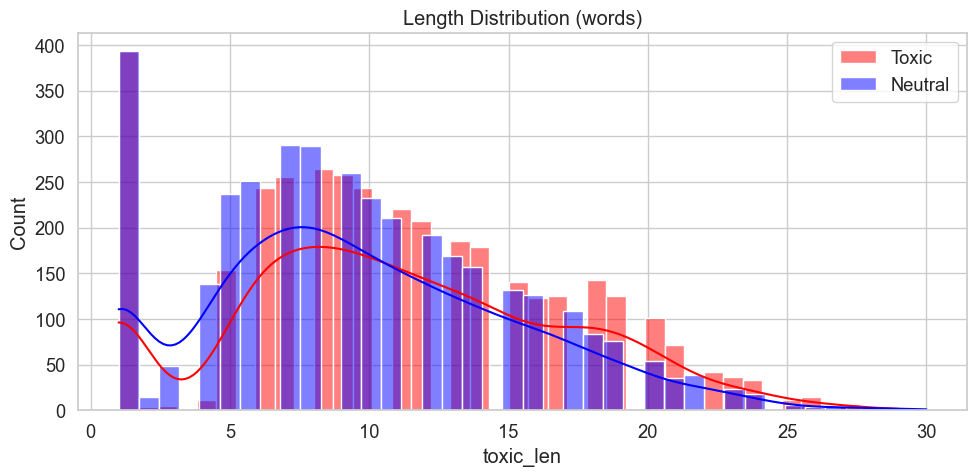

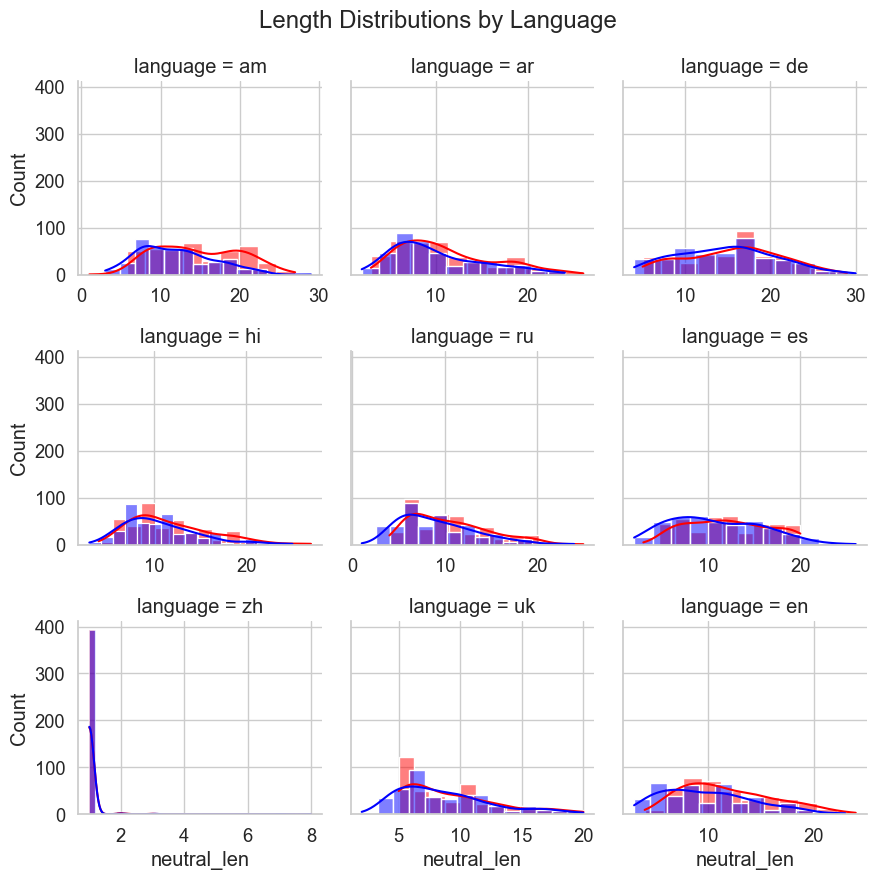

In [5]:
length_stats = analyzer.length_stats(by_language=True)
analyzer.plot_length_distribution(by_language=True)

[23:26:35] [INFO] [OVERLAP GLOBAL] mean=64.43, std=32.75, min=0.00, max=100.00
[23:26:35] [INFO] [OVERLAP am] mean=51.86, q50=55.56, samples=400
[23:26:35] [INFO] [OVERLAP ar] mean=81.58, q50=87.50, samples=400
[23:26:35] [INFO] [OVERLAP de] mean=85.52, q50=88.89, samples=400
[23:26:35] [INFO] [OVERLAP en] mean=69.24, q50=72.73, samples=400
[23:26:35] [INFO] [OVERLAP es] mean=69.03, q50=72.47, samples=400
[23:26:35] [INFO] [OVERLAP hi] mean=77.48, q50=83.33, samples=400
[23:26:35] [INFO] [OVERLAP ru] mean=64.27, q50=66.67, samples=400
[23:26:35] [INFO] [OVERLAP uk] mean=80.11, q50=83.33, samples=400
[23:26:35] [INFO] [OVERLAP zh] mean=0.74, q50=0.00, samples=400


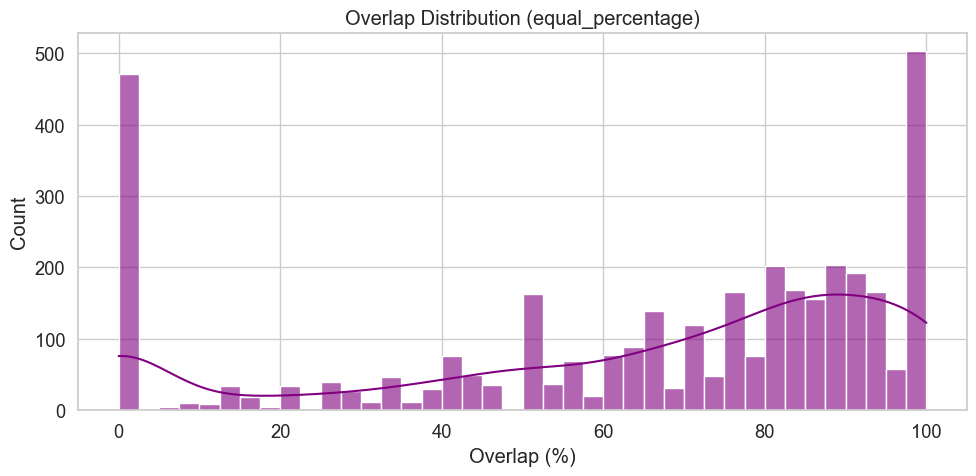

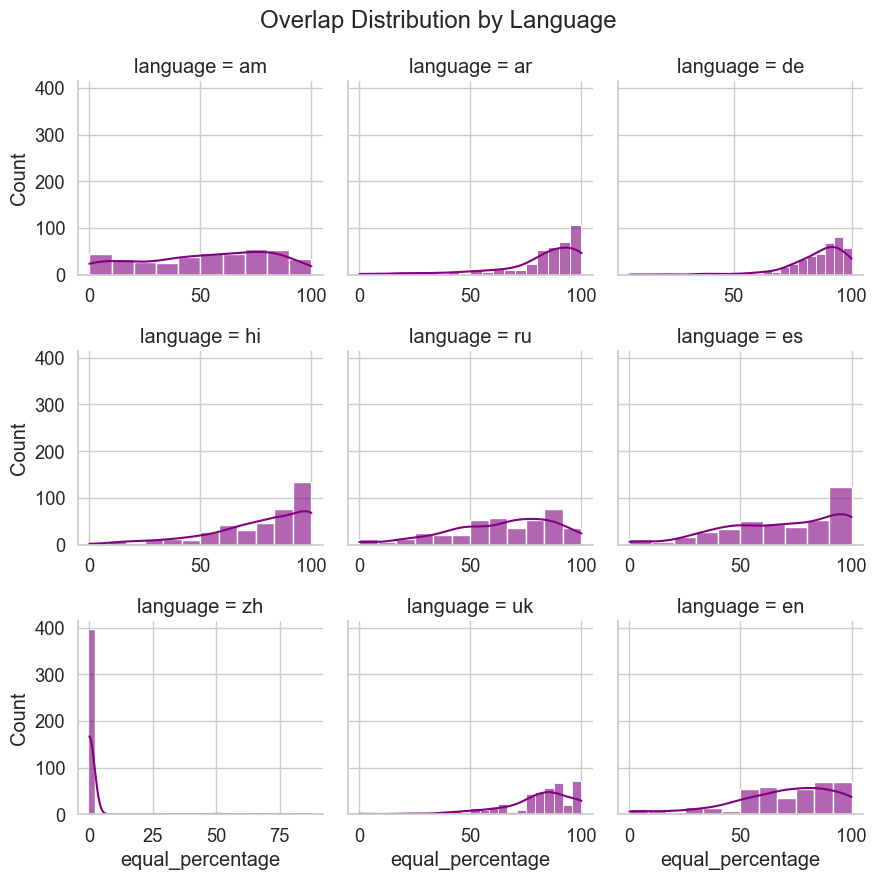

In [6]:
overlap = analyzer.overlap_stats(by_language=True)
analyzer.plot_overlap_distribution(by_language=True)

In [8]:
from finetunning_v2.tokenizer import DataTokenizer

data_tokenizer = DataTokenizer()

curriculum = dm.curriculum

tokenized_curriculum = data_tokenizer.tokenize_curriculum(curriculum)

tokenized_curriculum

c:\Users\mario\anaconda3\envs\nlp2\Lib\site-packages\transformers\convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Tokenizing dataset (num_proc=4):   0%|          | 0/1661 [00:00<?, ? examples/s]

Tokenizing dataset (num_proc=4):   0%|          | 0/708 [00:00<?, ? examples/s]

Tokenizing dataset (num_proc=4):   0%|          | 0/511 [00:00<?, ? examples/s]

Tokenizing dataset (num_proc=4):   0%|          | 0/2880 [00:00<?, ? examples/s]

{'easy': Dataset({
     features: ['input_ids', 'attention_mask', 'labels'],
     num_rows: 1661
 }),
 'medium': Dataset({
     features: ['input_ids', 'attention_mask', 'labels'],
     num_rows: 708
 }),
 'hard': Dataset({
     features: ['input_ids', 'attention_mask', 'labels'],
     num_rows: 511
 }),
 'full': Dataset({
     features: ['input_ids', 'attention_mask', 'labels'],
     num_rows: 2880
 })}

In [9]:
tokenized_curriculum['easy']

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1661
})